## Упражнение 19.1 (Простота и наглядность)


Целевая функция:
$$
F = 5x_1 + 4x_2 \rightarrow \max
$$

Ограничения:
$$
\begin{cases}
6x_1 + 4x_2 \leq 24 \\
x_1 + 2x_2 \leq 6 \\
-x_1 + x_2 \leq 1 \\
x_1, x_2 \geq 0
\end{cases}
$$

---

### Необходимо:

1. Построить целевую функцию  
2. Построить прямые, определяющие ограничения  
3. Определить точки пересечения прямых  
4. Определить решение графически


Подход:
1. В точке (0,0): F = 5·0 + 4·0 = 0
2. В точке (0,1): F = 5·0 + 4·1 = 4
3. В точке (4/3, 7/3): F = 5·(4/3) + 4·(7/3) = 20/3 + 28/3 = 48/3 = 16
4. В точке (3, 3/2): F = 5·3 + 4·(3/2) = 15 + 6 = 21
5. В точке (4,0): F = 5·4 + 4·0 = 20


In [357]:
!pip install nbformat 

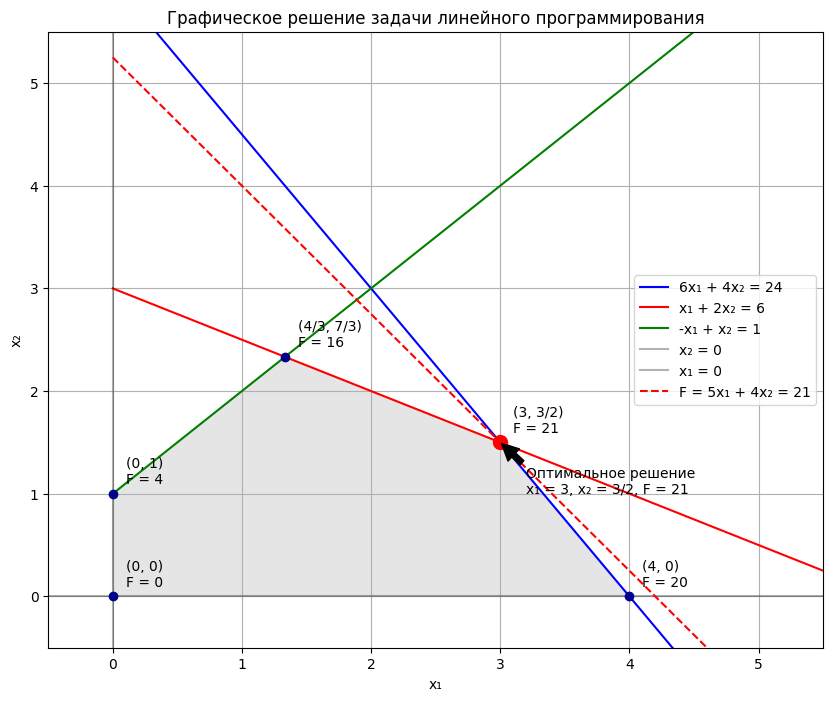

In [358]:
import numpy as np
import plotly.graph_objects as go
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt

def constraint1(x):
    # 6x_1 + 4x_2 = 24
    return (24 - 6*x) / 4

def constraint2(x):
    # x_1 + 2x_2 = 6
    return (6 - x) / 2

def constraint3(x):
    # -x_1 + x_2 = 1
    return 1 + x

def objective(x):
    # F = 5x_1 + 4x_2 = z
    # x_2 = (z - 5x_1) / 4
    return (21 - 5*x) / 4 

plt.figure(figsize=(10, 8))
x = np.linspace(0, 6, 1000)

plt.plot(x, constraint1(x), label='6x₁ + 4x₂ = 24', color='blue')
plt.plot(x, constraint2(x), label='x₁ + 2x₂ = 6', color='red')
plt.plot(x, constraint3(x), label='-x₁ + x₂ = 1', color='green')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, label='x₂ = 0')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3, label='x₁ = 0')

vertices = [(0, 0), (0, 1), (4/3, 7/3), (3, 3/2), (4, 0)]
labels = ['(0, 0)', '(0, 1)', '(4/3, 7/3)', '(3, 3/2)', '(4, 0)']
f_values = [0, 4, 16, 21, 20]

x_vertices = [v[0] for v in vertices]
y_vertices = [v[1] for v in vertices]
plt.fill(x_vertices, y_vertices, alpha=0.2, color='gray')

for i, (vertex, label, f_val) in enumerate(zip(vertices, labels, f_values)):
    plt.plot(vertex[0], vertex[1], 'o', markersize=6, color='darkblue')
    plt.annotate(f'{label}\nF = {f_val}', 
                 xy=vertex, 
                 xytext=(vertex[0]+0.1, vertex[1]+0.1))

optimal = vertices[3]
plt.plot(optimal[0], optimal[1], 'o', markersize=10, color='red')
plt.annotate('Оптимальное решение\nx₁ = 3, x₂ = 3/2, F = 21', 
             xy=optimal, 
             xytext=(optimal[0]+0.2, optimal[1]-0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(x, objective(x), 'r--', label='F = 5x₁ + 4x₂ = 21')

plt.xlim(-0.5, 5.5)
plt.ylim(-0.5, 5.5)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Графическое решение задачи линейного программирования')
plt.grid(True)
plt.legend()

plt.show()

In [359]:
# //

### Упражнение 19.2 (Пакет с пакетами)

Целевая функция:

$$
F = 3x_1 + 4x_2 + 2x_3 + 5x_4 + 6x_5 + 7x_6 + 8x_7 + 9x_8 + 10x_9 + 11x_{10} \to \max
$$

\begin{cases}
x_1 + 2x_2 + 3x_3 + x_4 + 4x_5 + 6x_6 + 7x_7 + 8x_8 + 9x_9 + 10x_{10} \leq 30 \\
2x_1 + x_2 + 2x_3 + 3x_4 + 2x_5 + 3x_6 + 4x_7 + 5x_8 + x_9 + 3x_{10} \leq 20 \\
3x_1 + x_2 + x_3 + 4x_5 + 5x_6 + 2x_7 + 3x_8 + 2x_9 + x_{10} \leq 25 \\
4x_1 + 2x_2 + 5x_3 + x_4 + 2x_5 + 3x_6 + 5x_7 + 6x_8 + 2x_9 + 4x_{10} \leq 18 \\
5x_1 + 6x_2 + x_3 + 3x_4 + 4x_5 + 6x_7 + 7x_8 + x_9 + 2x_{10} \leq 22 \\
2x_1 + 3x_2 + 4x_3 + x_4 + 3x_5 + 2x_6 + 5x_8 + 7x_9 + 8x_{10} \leq 19 \\
x_i \geq 0, \quad \forall x_i
\end{cases}


In [360]:
# /TODO: to vector
import pulp
import numpy as np
import pandas as pd
from IPython.display import display


objective = [3, 4, 2, 5, 6, 7, 8, 9, 10, 11]


A = np.array([
    [1, 2, 3, 1, 4, 6, 7, 8, 9, 9],
    [2, 1, 2, 3, 2, 4, 5, 1, 3, 3],
    [3, 4, 3, 4, 5, 1, 3, 2, 2, 1],
    [4, 2, 5, 1, 2, 3, 5, 2, 4, 10],
    [1, 2, 5, 3, 2, 4, 5, 3, 4, 3],
    [5, 6, 3, 3, 4, 6, 7, 8, 9, 10],
    [2, 3, 4, 3, 4, 2, 5, 7, 8, 10]
])


b = [30, 20, 25, 25, 18, 22, 19]

prob = pulp.LpProblem("Exercise_19_2", pulp.LpMaximize)
x = [pulp.LpVariable(f"x{i+1}", lowBound=0) for i in range(10)]

prob += pulp.lpSum([coeff * var for coeff, var in zip(objective, x)])

for i in range(len(b)):
    prob += pulp.lpSum([A[i, j] * x[j] for j in range(10)]) <= b[i] 

prob.solve()

solution = [pulp.value(var) for var in x]
non_zero_solution = {f"x{i+1}": val for i, val in enumerate(solution) if val != 0} #enumerate(solution) — это встроенная функция Python, которая возвращает итератор пар (индекс, значение) для списка solution.

print("Оптимальное решение:")
for var, val in non_zero_solution.items():
    print(f"{var} = {val}")

print(f"Оптимальное значение: {pulp.value(prob.objective)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/user/3course/operation-research/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/0be1305ed13544b0a3065ce0cbe7e9c2-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/0be1305ed13544b0a3065ce0cbe7e9c2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 93 RHS
At line 101 BOUNDS
At line 102 ENDATA
Problem MODEL has 7 rows, 10 columns and 70 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 7 (0) rows, 10 (0) columns and 70 (0) elements
0  Obj -0 Dual inf 72.124999 (10)
0  Obj -0 Dual inf 72.124999 (10)
4  Obj 33.583333
Optimal - objective value 33.583333
Optimal objective 33.58333333 - 4 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Оптимал

# Упражнение 19.3: Учебный план

Для новых специальностей на факультете радиофизики запланировано **3500 учебных часов**. Нужно распределить часы между разделами подготовки студентов, минимизируя затраты на разработку учебного плана. Разделы и затраты на разработку приведены в таблице:

| Раздел                 | Затраты z_i  |
|------------------------|---------------------|
| Аэрокосмос  x_1 | 3                   |
| Физика x_2     | 1                   |
| Микроэлектроника x_3 | 2             |
| Математика x_4 | 1                   |
| Компьютерная безопасность x_5 | 3   |
| Программирование x_6 | 1             |
| Радиофизика x_7 | 2                  |
| Статистика x_8  | 1                  |
| Машинное обучение x_9 | 2            |

**Минимальные часы для некоторых разделов:**

| Раздел                 | Минимальные часы |
|------------------------|------------------|
| Аэрокосмос x_1 | 300              |
| Микроэлектроника x_3 | 300        |
| Компьютерная безопасность x_5 | 400 |
| Радиофизика x_7 | 300             |
| Машинное обучение x_9| 400       |





In [361]:
prob = pulp.LpProblem("Exercise_19_3", pulp.LpMinimize)
x = [pulp.LpVariable(f"x{i+1}", lowBound=0, cat='Integer') for i in range(9)]

**Целевая функция (минимизация затрат):**

$$
Z = 3x_1 + x_2 + 2x_3 + x_4 + 3x_5 + x_6 + 2x_7 + x_8 + 2x_9 \to \min
$$
(Z — затраты, которые нужно минимизировать)

In [362]:
Z = [3, 1, 2, 1, 3, 1, 2, 1, 2]  
prob += pulp.lpSum([coeff * var for coeff, var in zip(Z, x)])

print(prob)

Exercise_19_3:
MINIMIZE
3*x1 + 1*x2 + 2*x3 + 1*x4 + 3*x5 + 1*x6 + 2*x7 + 1*x8 + 2*x9 + 0.0
VARIABLES
0 <= x1 Integer
0 <= x2 Integer
0 <= x3 Integer
0 <= x4 Integer
0 <= x5 Integer
0 <= x6 Integer
0 <= x7 Integer
0 <= x8 Integer
0 <= x9 Integer



**Ограничения**

\begin{cases}
x_1 \geq 300 & \text{(Аэрокосмос)} \\
x_3 \geq 300 & \text{(Микроэлектроника)} \\
x_5 \geq 400 & \text{(Компьютерная безопасность)} \\
x_7 \geq 300 & \text{(Радиофизика)} \\
x_9 \geq 400 & \text{(Машинное обучение)} \\
x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 = 3500 & \text{(Общее количество часов)} \\
x_i \geq 0 & \text{(Неотрицательность)}
\end{cases}

In [363]:
prob += x[0] >= 300  
prob += x[2] >= 300  
prob += x[4] >= 400  
prob += x[6] >= 300  
prob += x[8] >= 400  
# print(prob)

prob += pulp.lpSum(x) == 3500
# print(prob)


**Соотношения между часами**


\begin{cases}
x_1 - x_7 \geq 0 & \text{(Аэрокосмос \(\geq\) Радиофизика)} \\
x_1 - x_6 \geq 0 & \text{(Аэрокосмос \(\geq\) Программирование)} \\
x_2 - x_3 \leq 0 & \text{(Физика \(\leq\) Микроэлектроника)} \\
x_3 - 2x_6 \geq 0 & \text{(Микроэлектроника \(\geq\) 2 \(\cdot\) Программирование)} \\
2x_2 - x_7 \leq 0 & \text{(2 \(\cdot\) Физика \(\leq\) Радиофизика)} \\
2x_4 - x_7 \leq 0 & \text{(2 \(\cdot\) Математика \(\leq\) Радиофизика)} \\
x_2 - x_5 \leq 0 & \text{(Физика \(\leq\) Компьютерная безопасность)} \\
x_4 - x_5 \leq 0 & \text{(Математика \(\leq\) Компьютерная безопасность)} \\
x_5 - 2x_6 \geq 0 & \text{(Компьютерная безопасность \(\geq\) 2 \(\cdot\) Программирование)} \\
x_4 - x_9 \leq 0 & \text{(Математика \(\leq\) Машинное обучение)} \\
x_6 - x_9 \leq 0 & \text{(Программирование \(\leq\) Машинное обучение)} \\
x_8 - x_9 \leq 0 & \text{(Статистика \(\leq\) Машинное обучение)} \\
\end{cases}

In [364]:

prob += x[0] - x[6] >= 0  
prob += x[0] - x[5] >= 0  
prob += x[1] - x[2] <= 0  
prob += x[2] - 2 * x[5] >= 0  
prob += 2 * x[1] - x[6] <= 0  
prob += 2 * x[3] - x[6] <= 0  
prob += x[1] - x[4] <= 0  
prob += x[3] - x[4] <= 0  
prob += x[4] - 2 * x[5] >= 0  
prob += x[3] - x[8] <= 0  
prob += x[5] - x[8] <= 0  
prob += x[7] - x[8] <= 0  


In [365]:

prob.solve()
solution = [pulp.value(var) for var in x]
objective_value = pulp.value(prob.objective)

print("Оптимальное распределение часов:")
for i, val in enumerate(solution):
    print(f"x{i+1} = {val}")

print(f"Минимальные затраты: {objective_value}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/user/3course/operation-research/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/e9acbd6d68c04c1da29cc81faf528987-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/e9acbd6d68c04c1da29cc81faf528987-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 23 COLUMNS
At line 89 RHS
At line 108 BOUNDS
At line 118 ENDATA
Problem MODEL has 18 rows, 9 columns and 38 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 6375 - 0.00 seconds
Cgl0003I 0 fixed, 3 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 13 rows, 9 columns (9 integer (0 of which binary)) and 33 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0012I Integer solution of 6375 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 second

# Упражнение 19.4 (Работа не волк, а work)

Лишенный стипендии студент для поддержания своего финансового уровня должен подрабатывать и получить не менее 700 руб в месяц. У него есть следующие альтернативы

| Работа              | Часов (мин) | Часов (макс) | Напряженность | Доход/час |
|---------------------|-------------|--------------|----------------|-----------|
| Курьер              | 10          | 20           | 12             | 10        |
| Повар               | 20          | 40           | 8              | 11        |
| Грузчик             | 5           | 60           | 15             | 8         |
| Продавец            | 25          | 70           | 10             | 12        |
| Фриланс разработчик | 20          | 50           | 20             | 30        |

Понятно, что общая напряженность в месяц пропорциональна количеству отработанных часов. Найдите оптимальную занятость студента.


In [366]:
from pulp import *
x = [LpVariable(f'x{i+1}', lowBound=0, cat='Integer') for i in range(5)]
model = LpProblem("Work_Optimization", LpMinimize)

**Целевая функция (минимизация затрат):**

$$
Z = 12x_1 + 8x_2 + 15x_3 + 10x_4 + 20x_5  \to \min
$$

In [367]:
Z = [12, 8, 15, 10, 20]
model += lpSum([Z[i] * x[i] for i in range(5)])

\begin{cases}
10x_1 + 11x_2 + 8x_3 + 12x_4 + 30x_5 \geq 700 \\
10 \leq x_1 \leq 20 \\
20 \leq x_2 \leq 40 \\
5 \leq x_3 \leq 60 \\
25 \leq x_4 \leq 70 \\
20 \leq x_5 \leq 50 \\
\end{cases}



In [368]:
income_per_hour = [10, 11, 8, 12, 30]
model += lpSum([income_per_hour[i] * x[i] for i in range(5)]) >= 700
min_hours = [10, 20, 5, 25, 20]
for i in range(5):
    model += x[i] >= min_hours[i]
max_hours = [20, 40, 60, 70, 50]
for i in range(5):
    model += x[i] <= max_hours[i]

In [369]:

model.solve()

print("Статус:", LpStatus[model.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/user/3course/operation-research/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/bc5af6b5fe914ac0838c70d82d569bd5-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/bc5af6b5fe914ac0838c70d82d569bd5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 16 COLUMNS
At line 47 RHS
At line 59 BOUNDS
At line 65 ENDATA
Problem MODEL has 11 rows, 5 columns and 15 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1005 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 1005 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory w

In [370]:
print("Минимальная общая напряжённость:", value(model.objective))
print("Оптимальное распределение часов:")
i = 0
res = 0
for var in x:
    print(f"{var.name} = {var.varValue}")
    res += income_per_hour[i] * var.varValue
    i += 1

print(res)


Минимальная общая напряжённость: 1005.0
Оптимальное распределение часов:
x1 = 10.0
x2 = 20.0
x3 = 5.0
x4 = 25.0
x5 = 20.0
1260.0


# Упражнение 19.5 — *На всю котлету*

Столовая №8 готовит блюда из базовых продуктов. Поставки продуктов ограничены, а каждый вид блюда требует ингредиенты в заданных пропорциях. Требуется минимизировать затраты на закупку сырья при выполнении минимального спроса на блюда.

---

## Базовые продукты:

| Продукт    | Обозначение | Ограничение (кг) | Стоимость (руб/кг) |
|------------|--------------|------------------|---------------------|
| Овощи      | x1           | ≤ 50             | 3                   |
| Крупа      | x2           | ≤ 30             | 1                   |
| Мясо       | x3           | ≤ 10             | 12                  |
| Макароны   | x4           | ≤ 20             | 5                   |

---

## Блюда и пропорции:

| Блюдо      | Обозначение | Состав                    | Пропорции | Спрос (порций в день) |
|------------|-------------|---------------------------|-----------|------------------------|
| Супы       | y1          | Овощи, Крупа, Мясо        | 2:3:1     | ≥ 15                   |
| Гарнир     | y2          | Овощи, Крупа              | 1:1       | ≥ 20                   |
| Горячее    | y3          | Мясо, Макароны            | 3:2       | ≥ 10                   |
| Салаты     | y4          | Мясо, Овощи               | 1:8       | ≥ 5                    |


In [371]:
from pulp import *

q = [3, 1, 12, 5]  # овощи, крупа, мясо, макароны

limits = [50, 30, 10, 20]  # овощи, крупа, мясо, макароны

p = [25, 7, 60, 50]  # суп, гарнир, горячее, салат

min_demand = [15, 20, 10, 5] 

portion_weights = [0.3, 0.2, 0.25, 0.18]  # суп, гарнир, горячее, салат

proportions = [
    [2, 3, 1, 0],  # суп
    [1, 1, 0, 0],  # гарнир
    [0, 0, 3, 2],  # горячее
    [8, 0, 1, 0]   # салат
]

normalized_proportions = []
for i, prop in enumerate(proportions):
    total_prop = sum(prop)

    normalized = [p/total_prop * portion_weights[i] if total_prop > 0 else 0 for p in prop]
    normalized_proportions.append(normalized)

 


**Целевая функция:**
$$
Z = 4y_1 + 3y_2 + 14y_3 + 14y_4 \to \max
$$



In [372]:
Z = [p_i - v_i for p_i, v_i in zip(p, v)]
prob = LpProblem("Maximize_Profit", LpMaximize)
y = [LpVariable(f"y{i+1}", lowBound=0, cat="Integer") for i in range(4)]
prob += lpSum(Z[i] * y[i] for i in range(4))

\begin{cases}
y_1 \geq 15 & \text{(Суп: минимум 15 порций)} \\
y_2 \geq 20 & \text{(Гарнир: минимум 20 порций)} \\
y_3 \geq 10 & \text{(Горячее: минимум 10 порций)} \\
y_4 \geq 5 & \text{(Салат: минимум 5 порций)} \\
2y_1 + 1y_2 + 8y_4 \leq 150 & \text{(Овощи: не более 150 единиц)} \\
3y_1 + 1y_2 \leq 90 & \text{(Крупа: не более 90 единиц)} \\
1y_1 + 3y_3 + 1y_4 \leq 50 & \text{(Мясо: не более 50 единиц)} \\
2y_3 \leq 60 & \text{(Макароны: не более 60 единиц)} \\
y_j \geq 0, \quad \forall j = 1, 2, 3, 4 & \text{(Все переменные больше или равны 0)} \\
y_j \in \mathbb{Z}, \quad \forall j = 1, 2, 3, 4 & \text{(Все переменные — целые числа)}
\end{cases}

In [373]:
prob += y[0] >= 15  
prob += y[1] >= 20  
prob += y[2] >= 10 
prob += y[3] >= 5   
prob += (
    2*y[0] + 1*y[1] + 8*y[3] <= 150  
)
prob += (
    3*y[0] + 1*y[1] <= 90          
)
prob += (
    1*y[0] + 3*y[2] + 1*y[3] <= 50 
)
prob += (
    2*y[2] <= 60                    
)


In [374]:
prob.solve()
print("Статус:", LpStatus[prob.status])
print("Максимальная прибыль:", value(prob.objective))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/user/3course/operation-research/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/d0cf6584b1494b78b1e6ecacf9a979f7-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/d0cf6584b1494b78b1e6ecacf9a979f7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 39 RHS
At line 48 BOUNDS
At line 53 ENDATA
Problem MODEL has 8 rows, 4 columns and 13 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 405 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -405 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomor

In [375]:
print("Порции по каждому блюду:")
for var in y:
    print(f"{var.name} = {var.varValue}")

Порции по каждому блюду:
y1 = 15.0
y2 = 45.0
y3 = 10.0
y4 = 5.0


# Упражнение 19.6(Враг в отражении)
Решите двойственную к следующей задачу ЛП, а затем найдите оптимальное решение прямой задачи. Даёт ли в этом случае вычислительное преимущество по сравнению с решением прямой задачи ЛП?

$$
F = 5x_1 + 6x_2 + 3x_3 \to \min 
$$

\begin{cases}
5x_1 + 5x_2 + 3x_3 \geq 50  \\
x_1 + x_2 - x_3 \geq 20 \\
7x_1 + 6x_2 - 9x_3 \geq 30 \\
5x_1 + 5x_2 + 5x_3 \geq 35  \\
2x_1 + 4x_2 - 15x_3 \geq 10 \\
12x_1 + 10x_2 \geq 90 \\
x_2-10x_3 \geq 20  \\
x_1, x_2, x_3 \geq 0 \\
\end{cases}

In [376]:
from pulp import *

prob = LpProblem("Minimize_Primal_19_6", LpMinimize)

x1 = LpVariable("x1", lowBound=0, cat="Continuous")  # Количество такс первого типа
x2 = LpVariable("x2", lowBound=0, cat="Continuous")  # Количество такс второго типа
x3 = LpVariable("x3", lowBound=0, cat="Continuous")  # Количество такс третьего типа

# Целевая функция
prob += 5 * x1 + 6 * x2 + 3 * x3, "Objective Function"

# Ограничения
prob += 5 * x1 + 5 * x2 + 3 * x3 >= 50, "Average Load Constraint"
prob += x1 + x2 - x3 >= 20, "Difference Constraint"
prob += 7 * x1 + 6 * x2 - 9 * x3 >= 30, "Computational Performance Constraint"
prob += 5 * x1 + 5 * x2 + 5 * x3 >= 35, "Total Quantity Constraint"
prob += 2 * x1 + 4 * x2 - 15 * x3 >= 10, "Weighted Difference Constraint"
prob += 12 * x1 + 10 * x2 >= 90, "Contribution Constraint"
prob += x2 - 10 * x3 >= 20, "Second Type Limit"

# Решение задачи
prob.solve()

# Вывод результатов
print("Статус:", LpStatus[prob.status])
print("Оптимальные значения переменных:")
print(f"x1 = {value(x1)}")
print(f"x2 = {value(x2)}")
print(f"x3 = {value(x3)}")
print("Оптимальное значение функции (F):", value(prob.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/user/3course/operation-research/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/a52fadb208a84f979b1a568b9a4aaeb1-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/a52fadb208a84f979b1a568b9a4aaeb1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 35 RHS
At line 43 BOUNDS
At line 44 ENDATA
Problem MODEL has 7 rows, 3 columns and 19 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-7) rows, 0 (-3) columns and 0 (-19) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 120
After Postsolve, objective 120, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 120 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallc

## Преобразование в двойственную задачу

### Шаг 1: Приведение к стандартной форме

Для построения двойственной задачи преобразуем ограничения, умножив на \(-1\). Получили:

$$
F = 5x_1 + 6x_2 + 3x_3 \to \min
$$

\begin{cases}
-5x_1 - 5x_2 - 3x_3 \leq -50 \\
-x_1 - x_2 + x_3 \leq -20 \\
-7x_1 - 6x_2 + 9x_3 \leq -30 \\
-5x_1 - 5x_2 - 5x_3 \leq -35 \\
-2x_1 - 4x_2 + 15x_3 \leq -10 \\
-12x_1 - 10x_2 \leq -90 \\
-x_2 + 10x_3 \leq -20 \\
x_1, x_2, x_3 \geq 0
\end{cases}

Вектор правой части ограничений (\( b \)):
$$b = [50, 20, 30, 35, 10, 90, 20]$$
Матрица коэффициентов прямой задачи (\( A \)):

$$
A = \begin{bmatrix}
-5 & -5 & -3 \\
-1 & -1 & 1 \\
-7 & -6 & 9 \\
-5 & -5 & -5 \\
-2 & -4 & 15 \\
-12 & -10 & 0 \\
0 & -1 & 10
\end{bmatrix}
$$

\[
b = [50, 20, 30, 35, 10, 90, 20]
\] 

Транспонированная матрица \( A^T \):

$$
A^T = \begin{bmatrix}
5 & 1 & 7 & 5 & 2 & 12 & 0 \\
5 & 1 & 6 & 5 & 4 & 10 & 1 \\
3 & -1 & -9 & 5 & -15 & 0 & -10
\end{bmatrix}
$$


Коэффициенты целевой функции прямой задачи (\( c = [5, 6, 3] \)) становятся правой частью ограничений двойственной задачи.

### Итоговая двойственная задача

$$
W = 50y_1 + 20y_2 + 30y_3 + 35y_4 + 10y_5 + 90y_6 + 20y_7 \to \max
$$

$$
\begin{cases}
5y_1 + y_2 + 7y_3 + 5y_4 + 2y_5 + 12y_6 \leq 5 & \text{(для \( x_1 \))} \\
5y_1 + y_2 + 6y_3 + 5y_4 + 4y_5 + 10y_6 + y_7 \leq 6 & \text{(для \( x_2 \))} \\
3y_1 - y_2 - 9y_3 + 5y_4 - 15y_5 - 10y_7 \leq 3 & \text{(для \( x_3 \))} \\
y_1, y_2, y_3, y_4, y_5, y_6, y_7 \geq 0
\end{cases}
$$


In [377]:
from pulp import *
W = [50, 20, 30, 35, 10, 90, 20] 
prob = LpProblem("Maximize_Dual_19_6", LpMaximize)
y = [LpVariable(f"y{i+1}", lowBound=0, cat="Integer") for i in range(7)]
prob += lpSum(W[i] * y[i] for i in range(7)), "Objective Function"

prob += 5 * y[0] + 1 * y[1] + 7 * y[2] + 5 * y[3] + 2 * y[4] + 12 * y[5] + 0 * y[6] <= 5
prob += 5 * y[0] + 1 * y[1] + 6 * y[2] + 5 * y[3] + 4 * y[4] + 10 * y[5] + 1 * y[6] <= 6 
prob += 3 * y[0] - 1 * y[1] - 9 * y[2] + 5 * y[3] - 15 * y[4] + 0 * y[5] + 0 * y[6] <= 3



In [378]:
prob.solve()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/user/3course/operation-research/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/f0496c274bff4957bf88e1b72c5f3862-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/f0496c274bff4957bf88e1b72c5f3862-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 48 RHS
At line 52 BOUNDS
At line 60 ENDATA
Problem MODEL has 3 rows, 7 columns and 18 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 120 - 0.00 seconds
Cgl0003I 1 fixed, 0 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 2 rows, 4 columns (4 integer (2 of which binary)) and 7 elements
Cutoff increment increased from 1e-05 to 9.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 8.88178e-16
Cbc0038I Solution found of -120
Cbc003

1

In [379]:

print("Статус:", LpStatus[prob.status])
print("Оптимальные значения переменных:")
for i in range(7):
    print(f"y{i+1} = {value(y[i])}")
print("Оптимальное значение двойственной функции:", value(prob.objective))

Статус: Optimal
Оптимальные значения переменных:
y1 = 0.0
y2 = 0.0
y3 = 0.0
y4 = 0.0
y5 = 0.0
y6 = 0.0
y7 = 6.0
Оптимальное значение двойственной функции: 120.0
